This notebook explores the processed data. It highlights characteristics of the data such as the breakdown between the 2 sentiment categories - positive and negative, the most common words used in the reviews and the distribution of the lengths of the reviews.

In [27]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------- ----------------------------- 81.9/299.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 3.1 MB/s eta 0:00:00


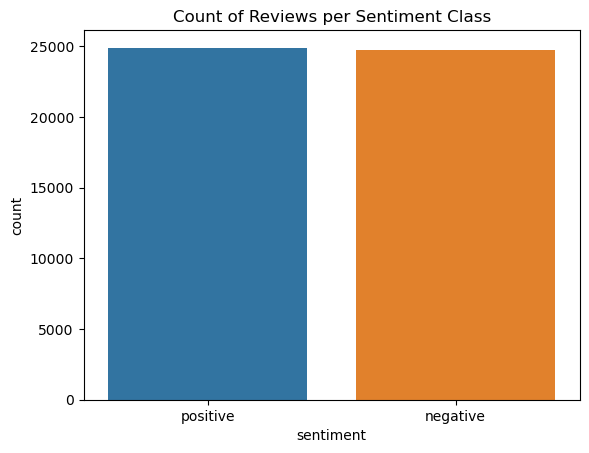

In [28]:
# Import visualisation libraries and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

df = pd.read_csv("IMDB Dataset Processed Lemma test.csv")
sns.countplot(x='sentiment', data=df)
plt.title("Count of Reviews per Sentiment Class")
plt.show()

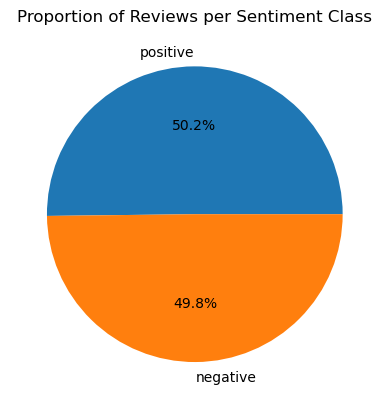

In [13]:
label_count = df["sentiment"].value_counts()
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%')
plt.title("Proportion of Reviews per Sentiment Class")
plt.show()

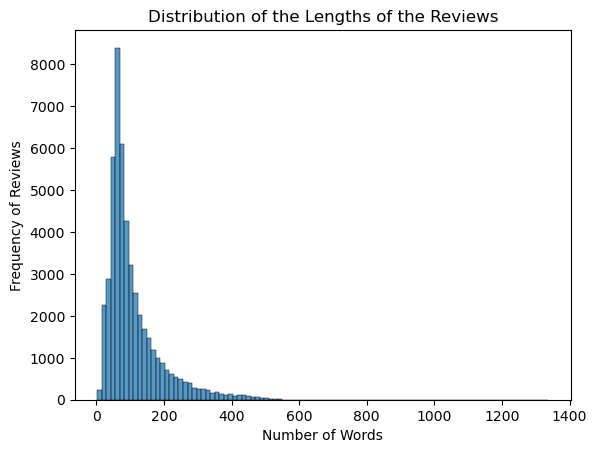

In [29]:
df["length_of_review"] = df["cleaned_review"].apply(lambda x : len(x.split()))

sns.histplot(df['length_of_review'], bins=100)
plt.title("Distribution of the Lengths of the Reviews")
plt.xlabel("Number of Words")
plt.ylabel("Frequency of Reviews")
plt.show()

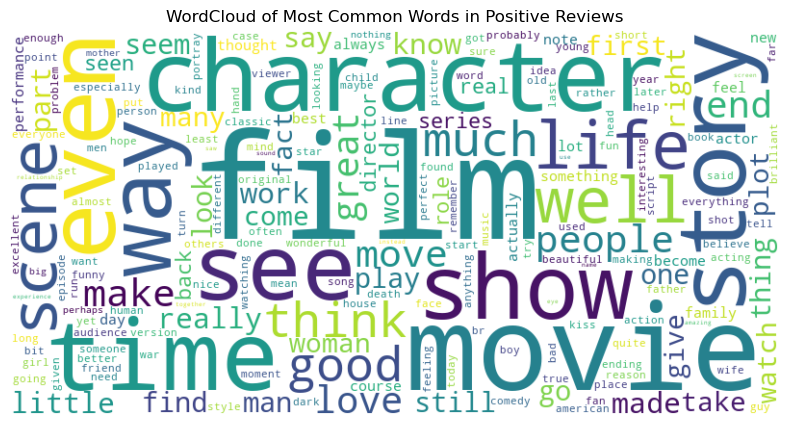

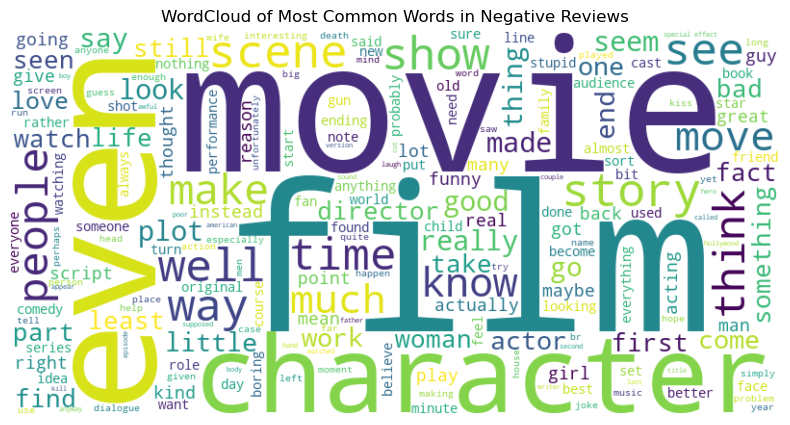

In [ ]:
all_positive_reviews = df[df["sentiment"] == "positive"]
all_negative_reviews = df[df["sentiment"] == "negative"]

all_positive_text = ' '.join(all_positive_reviews['cleaned_review'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Most Common Words in Positive Reviews')
plt.show()

all_negative_text = ' '.join(all_negative_reviews['cleaned_review'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Most Common Words in Negative Reviews')
plt.show()